In [1]:
import math
import pandas as pd
import tensorflow as tf
# import keras_tuner.tuners as kt
import matplotlib.pyplot as plt
import keras
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
import numpy as np
import pickle
np.random.seed(0)
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv1D, Conv2D, LeakyReLU, MaxPool1D, AveragePooling1D, UpSampling1D, Flatten, Dense, Reshape, BatchNormalization
# https://towardsdatascience.com/improve-your-model-performance-with-auto-encoders-d4ee543b4154
from tensorflow.keras import initializers
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [2]:
x_train_scaled = pd.read_csv('260_sample_train_scaled.csv').set_index("Patient_ID")
x_train_scaled

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
55_control,0.702813,0.799052,0.719665,0.729547,0.794953,0.256451,1.000000,0.363133,0.374212,0.611161,...,0.468042,0.335792,0.0,0.609518,0.535456,0.0,0.543158,0.622641,0.0,1.0
168_CD_plain,0.751408,0.603707,0.622768,0.627712,0.606860,0.520576,0.311962,0.251356,0.553554,0.441131,...,0.000000,0.159464,0.0,0.173529,0.018188,0.0,0.623796,0.301179,0.0,0.0
72_control,0.786508,0.755331,0.739605,0.756170,0.819875,0.391132,0.648401,0.134017,0.200420,0.679453,...,0.335173,0.241577,0.0,0.659563,0.000000,0.0,0.853118,0.431083,0.0,0.0
120_control,0.707491,0.662993,0.648072,0.764621,0.654276,0.633929,0.579519,0.248934,0.759250,0.755407,...,0.181256,0.297248,0.0,0.837676,0.480372,0.0,0.392582,0.390569,0.0,0.0
258_CD_plain,0.701039,0.662511,0.707208,0.834562,0.670160,0.410612,0.370517,0.244987,0.445387,0.798000,...,0.319013,0.306320,0.0,0.893448,0.485539,0.0,0.259900,0.431818,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15_CD_plain,0.382762,0.384030,0.377332,0.360165,0.300915,0.340090,0.077348,0.890965,0.261140,0.205779,...,0.209212,0.301844,0.0,0.643267,0.143476,0.0,0.262892,0.189790,0.0,0.0
182_CD_plain,0.679910,0.584723,0.722426,0.643867,0.740014,0.650358,0.468650,0.295686,0.649939,0.609862,...,0.408592,0.042243,0.0,0.765285,0.527984,0.0,0.413798,0.270021,0.0,0.0
164_CD_plain,0.754656,0.556562,0.694062,0.748334,0.535534,0.133869,0.319071,0.154562,0.440487,0.824013,...,0.514164,0.364434,0.0,0.930260,0.481733,0.0,0.273699,0.433093,0.0,0.0


In [3]:
x_test_scaled = pd.read_csv('260_sample_test_scaled.csv').set_index("Patient_ID")
x_test_scaled

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
253_CD_plain,0.869185,0.841880,0.930171,0.886737,0.835678,0.297964,0.668498,0.266670,0.278122,0.933520,...,0.339788,0.326732,0.0,0.862246,0.074473,0.0,0.498941,0.349920,0.0,0.0
105_CD_plain,0.853562,0.933532,0.942213,0.794578,0.890482,0.206529,0.298987,0.350745,0.495663,0.849038,...,0.354602,-0.031527,0.0,0.717305,0.039214,0.0,0.697073,0.268224,0.0,0.0
2_CD_plain,0.165531,0.141475,0.263684,0.198091,0.160503,0.888878,0.000000,0.134461,0.989132,0.202203,...,0.320002,0.379134,0.0,0.604202,0.610072,0.0,0.324065,0.375123,0.0,0.0
184_CD_plain,0.717121,0.660314,0.769417,0.752737,0.694874,0.514735,0.692365,0.271127,0.650742,0.694599,...,0.445680,0.178908,0.0,0.702114,0.325357,0.0,0.390919,0.185509,0.0,0.0
312_CD_plain,0.730072,0.722909,0.713076,0.743545,0.679258,0.308459,0.399235,0.129019,0.597529,0.720390,...,0.419254,0.312215,0.0,0.821584,0.632007,0.0,0.183158,0.271359,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,0.736123,0.658232,0.772323,0.685637,0.658755,0.250970,0.247307,0.422075,0.555944,0.603675,...,0.379431,0.233196,0.0,0.759342,0.567491,0.0,0.404604,0.190411,0.0,0.0
279_CD_plain,0.220614,0.202090,0.182810,0.113245,0.105744,0.699851,0.000000,0.908485,0.688912,0.178259,...,0.181052,0.342262,0.0,0.639644,0.540444,0.0,0.397274,0.061934,0.0,0.0
179_CD_plain,0.724476,0.726774,0.766943,0.776284,0.690339,0.380637,0.440449,0.318944,0.558600,0.738787,...,0.331961,0.275577,0.0,0.886616,0.658049,0.0,0.259391,0.471132,0.0,0.0


In [4]:
full_ds = pd.concat([x_train_scaled, x_test_scaled])
full_ds

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
55_control,0.702813,0.799052,0.719665,0.729547,0.794953,0.256451,1.000000,0.363133,0.374212,0.611161,...,0.468042,0.335792,0.0,0.609518,0.535456,0.0,0.543158,0.622641,0.0,1.0
168_CD_plain,0.751408,0.603707,0.622768,0.627712,0.606860,0.520576,0.311962,0.251356,0.553554,0.441131,...,0.000000,0.159464,0.0,0.173529,0.018188,0.0,0.623796,0.301179,0.0,0.0
72_control,0.786508,0.755331,0.739605,0.756170,0.819875,0.391132,0.648401,0.134017,0.200420,0.679453,...,0.335173,0.241577,0.0,0.659563,0.000000,0.0,0.853118,0.431083,0.0,0.0
120_control,0.707491,0.662993,0.648072,0.764621,0.654276,0.633929,0.579519,0.248934,0.759250,0.755407,...,0.181256,0.297248,0.0,0.837676,0.480372,0.0,0.392582,0.390569,0.0,0.0
258_CD_plain,0.701039,0.662511,0.707208,0.834562,0.670160,0.410612,0.370517,0.244987,0.445387,0.798000,...,0.319013,0.306320,0.0,0.893448,0.485539,0.0,0.259900,0.431818,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,0.736123,0.658232,0.772323,0.685637,0.658755,0.250970,0.247307,0.422075,0.555944,0.603675,...,0.379431,0.233196,0.0,0.759342,0.567491,0.0,0.404604,0.190411,0.0,0.0
279_CD_plain,0.220614,0.202090,0.182810,0.113245,0.105744,0.699851,0.000000,0.908485,0.688912,0.178259,...,0.181052,0.342262,0.0,0.639644,0.540444,0.0,0.397274,0.061934,0.0,0.0
179_CD_plain,0.724476,0.726774,0.766943,0.776284,0.690339,0.380637,0.440449,0.318944,0.558600,0.738787,...,0.331961,0.275577,0.0,0.886616,0.658049,0.0,0.259391,0.471132,0.0,0.0


In [5]:
train_set = x_train_scaled.copy()

In [6]:
test_set = x_test_scaled.copy()

### Dimensionality reduction with PCA

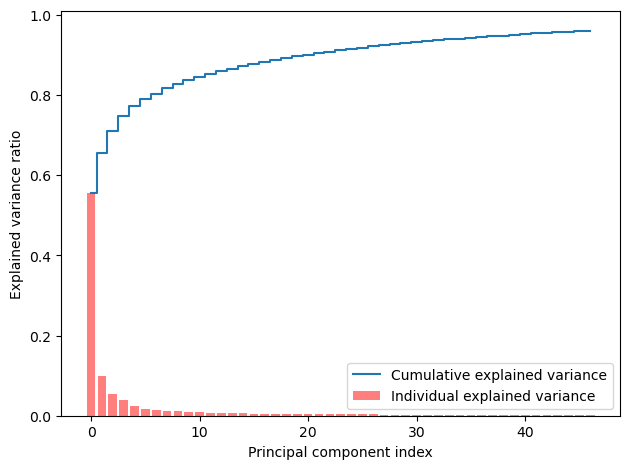

In [7]:
#https://vitalflux.com/pca-explained-variance-concept-python-example/#google_vignette

pca = PCA()
pca = PCA(n_components=.96)
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(train_set)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', color='r',label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [8]:
# https://www.datacamp.com/tutorial/principal-component-analysis-in-python

def encode_pca(dataset):
    comp_cols = np.asarray(np.arange(2), dtype=str)
    pca_x_test = PCA(n_components=32)
    principalComponents_x_test = pca_x_test.fit_transform(dataset)
    pca_x_test_ds = pd.DataFrame(data = principalComponents_x_test, 
                                       index=dataset.index)
    return pca_x_test_ds, pca_x_test

full_pca_dataset, pca_x = encode_pca(full_ds)
split_pt = int(0.7 * len(full_pca_dataset))
pca_test_dataset = full_pca_dataset[split_pt:]
pca_train_dataset = full_pca_dataset[:split_pt]

In [9]:
pca_train_dataset

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Patient_ID,,,,,,,,,,,,,,,,,,,,,
55_control,-1.400480,0.036085,0.633785,0.991954,1.244477,1.137486,0.029610,0.658527,1.078466,-0.619487,...,0.470832,0.133802,-0.203272,-0.410425,0.186449,0.298332,-0.400682,0.767596,0.619227,0.085812
168_CD_plain,0.343929,-0.897671,0.955659,-0.201677,0.422730,-0.572408,0.003687,0.056367,0.171045,0.062771,...,0.027877,-0.336420,-0.175358,0.370251,-0.039556,0.055334,0.058026,0.161180,0.149297,-0.265662
72_control,-2.307192,-0.267483,1.578081,0.496850,-0.234867,0.234571,0.184197,0.036992,-0.068803,-0.119890,...,0.183052,0.194263,0.234877,0.178692,0.362024,-0.116276,-0.019640,-0.014161,0.195361,-0.416527
120_control,0.352933,-1.007575,-0.545913,0.208984,-0.308962,-0.011900,-0.357425,0.045246,-0.176911,-0.057539,...,0.046615,0.026036,-0.092182,0.198564,0.214210,-0.068817,0.149709,-0.144454,-0.024551,-0.078279
258_CD_plain,-1.060160,-0.005791,-0.675548,0.336661,-0.086003,0.094171,-0.527973,-0.092358,0.061105,0.117648,...,-0.081974,-0.346245,0.006149,0.066966,-0.062242,0.032586,0.045676,0.160777,-0.083701,-0.201276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15_CD_plain,0.518700,2.631580,0.914480,-1.113737,-0.453870,-0.297425,0.328632,0.365649,0.381446,0.426910,...,-0.247678,-0.078042,0.051630,-0.065564,0.249531,-0.063245,0.432105,-0.029305,0.191425,-0.047575
182_CD_plain,0.876848,-0.873024,-0.229033,-0.623545,0.243320,0.249689,0.376666,-0.193785,-0.063964,-0.053892,...,0.198387,0.005078,0.106484,-0.248362,-0.114181,-0.104506,-0.110896,-0.119660,0.091979,0.218882
164_CD_plain,-1.977341,1.297043,-0.604174,0.409995,0.269979,0.258461,-0.132664,-0.176443,-0.008317,0.210307,...,-0.170181,0.229245,-0.190584,0.244012,0.039333,-0.238115,-0.067049,0.050171,0.149764,0.065102


In [10]:
# pca_train_dataset.to_csv("pca_train_dataset.csv")

In [11]:
# print('Explained variation per principal component: {}'.format(pca_x_test.explained_variance_ratio_))
# print("Total variance explained:",np.sum(pca_x_test.explained_variance_ratio_))

In [12]:
# pc1_var, pc2_var = np.round(pca_x_test.explained_variance_ratio_ * 100, 1)
# pc1_var

### Dimensionality reduction with autoencoder

In [13]:
sh = test_set.head(1).shape

In [14]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

from keras.optimizers import Adam, SGD, Adadelta

n_inputs = 219
n_bottleneck = 32
encoder = Sequential(
            [

#                 Input(shape=(n_inputs,)),
                # encoder level 1
                Dense(n_inputs*2),
                BatchNormalization(),
                LeakyReLU(),
                # encoder level 2
                Dense(n_inputs),
                BatchNormalization(),
                LeakyReLU(),
                # bottleneck
                Dense(n_bottleneck)
            ]
        )

In [15]:
encoder.load_weights("encoder_ckpt")
encoder.build(sh) 
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 438)                  96360     
                                                                 
 batch_normalization (BatchN  (1, 438)                 1752      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (1, 438)                  0         
                                                                 
 dense_1 (Dense)             (1, 219)                  96141     
                                                                 
 batch_normalization_1 (Batc  (1, 219)                 876       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (1, 219)                  0

In [16]:
def ae_encode_dataset(encoder, dataset):
    latent_var = np.arange(32)
    recon = encoder(dataset.values)
    r = pd.DataFrame(recon, columns=latent_var, index=dataset.index)
    return r
    
full_ae_dataset = ae_encode_dataset(encoder, full_ds)

split_pt = int(0.7 * len(full_ae_dataset))
ae_test_dataset = full_ae_dataset[split_pt:]
ae_train_dataset = full_ae_dataset[:split_pt]

In [17]:
ae_train_dataset

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Patient_ID,,,,,,,,,,,,,,,,,,,,,
55_control,2.884348,-4.333632,1.534629,0.357453,0.831423,-0.201379,-0.335116,1.899084,-1.299261,-0.198478,...,2.173890,0.097263,0.444464,0.296948,1.785042,-0.130478,1.609985,2.002768,0.458599,0.722745
168_CD_plain,1.049997,0.968498,-0.634117,-1.679890,1.635449,-2.056087,-0.223816,1.611414,-0.198338,-1.088065,...,0.259527,-1.898594,-0.041199,-1.653017,-2.995473,-1.641031,-1.288697,0.736618,1.602979,-2.933374
72_control,1.775126,-4.049808,1.087583,1.459852,1.401432,0.852619,2.032758,0.495711,-0.845361,-0.557329,...,0.797558,1.375275,0.568535,2.058962,5.145083,-0.905856,0.867203,3.922681,3.519151,5.548365
120_control,0.117591,0.435450,-0.473291,-1.583053,0.799566,-2.394346,-0.706611,0.784904,0.150020,-2.133907,...,-0.543700,-0.798991,-0.046313,-1.795849,-3.107322,-0.769194,-2.614375,1.161695,0.380128,-3.846728
258_CD_plain,0.443390,-0.772829,0.884035,-0.374245,-0.443627,0.055477,-0.811601,0.414232,-0.582810,-0.579333,...,-0.419681,1.280246,0.369904,-0.106852,2.210283,-1.252376,0.158098,1.858046,0.539129,0.515659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15_CD_plain,-3.672475,0.834738,1.542264,2.185633,-1.834641,3.122175,-1.350632,-2.351135,0.525460,3.629492,...,0.510670,-0.614047,2.294713,4.817264,1.498689,3.247430,3.975865,-4.355250,-1.201291,4.786653
182_CD_plain,-0.037418,1.366161,-0.056551,-1.735336,0.798326,-1.246346,-0.713014,0.526173,0.040249,-0.985651,...,0.190898,-0.660282,-0.221193,-1.727492,-3.602331,0.124196,-1.659816,-0.023671,-0.760651,-3.536419
164_CD_plain,0.310530,-2.311946,2.365372,1.838397,-1.330654,1.877666,-0.140262,-0.564555,-1.049672,0.395509,...,0.349844,2.943312,1.415317,2.549941,6.379101,-1.128445,1.433520,1.920403,0.837956,5.438933


## True labels

In [18]:
train_patient_ids = np.array(pca_train_dataset.index)


In [19]:
test_patient_ids = np.array(pca_test_dataset.index)


In [20]:
def classify(x):
    if "_control" in x: # control
        return 0
    elif "CD_plain" in x: # Crohn's Disease no deep ulcer
#         print(x)
        return 1
    elif "CD_deep_ulcer" in x: # Crohn's Disease deep ulcer
#         print(x)
        return 2
    else:
        return 3 # Ulcerative Collitis

vec = np.vectorize(classify)

train_disease_labels = vec(train_patient_ids)
test_disease_labels = vec(test_patient_ids)

In [21]:
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

## KMeans clustering

### Fit KMeans (PCA & tSNE dimensionality reduction)

In [22]:
pca_test_dataset.shape

(78, 32)

In [23]:
# compress to 2D with tSNE
tsne = manifold.TSNE(
    n_components=2,
    init="random",
    random_state=0,
    perplexity=24,
    n_iter=750,
    method='exact'
)
X = tsne.fit_transform(full_pca_dataset)
X_test_pca = X[split_pt:]
X_train_pca = X[:split_pt]
# X_train = np.concatenate([X[:split_pt], X[-num_c:]])

In [24]:
num_c=4
kmeans_pca = KMeans(num_c, random_state=0).fit(X_train_pca)
k_labels_train_pca = kmeans_pca.predict(X_train_pca)
k_labels_test_pca = kmeans_pca.predict(X_test_pca)


C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:


# representation of the KMeans model (both)
# centers = X[-num_c:]
centers_pca = kmeans_pca.cluster_centers_
radii_pca = [cdist(X_train_pca[k_labels_train_pca == i], [center]).max()
         for i, center in enumerate(centers_pca)]

In [26]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html


def plot_kmeans(Y, disease_labels, k_labels, centers, radii, reduction, num_c=4, test_set=True, selected_patient_idx=None):


    (fig, subplots) = plt.subplots(1, 2, figsize=(15, 6))


    label_sets = [k_labels, disease_labels]
    num_clusters = 3
    dset = "test" if test_set else "train"


    for i, label_set in enumerate(label_sets):
        ax = subplots[i]

        dset = "test" if test_set else "train"

        if i==0:
            num_clusters = num_c
            cluster_names = ["Cluster " + str(i) for i in range(num_clusters)]
            colours = ["chocolate", "darkblue", "magenta", "yellow", "blue"]
            ax.set_title("KMeans clustering on " + dset + " set with cluster labels shown \n (" + reduction + " dimensionality reduction)",
                         wrap=True)
        else:
            num_clusters = 3
            cluster_names = ["Control", "CD no ulcer", "CD deep ulcer"]
            colours = ["green", "orange", "red"]
            ax.set_title("KMeans clustering on " + dset + " set with true labels shown \n (" + reduction + " dimensionality reduction)",
                         wrap=True)
        for i in range(num_clusters):
            ax.scatter(Y[label_set==i, 0], Y[label_set==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2) 



        for c, r in zip(centers, radii):
            ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

        if selected_patient_idx is not None:
            ax.scatter(Y[selected_patient_idx, 0], Y[selected_patient_idx, 1], c="cyan", s=400, marker='*',edgecolor='black', linewidth=.7, label="Selected patient")

        ax.legend()

        ax.axis("tight")
    plt.show()




C:\Users\shard\AppData\Local\Temp\ipykernel_35776\3552133945.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(Y[label_set==i, 0], Y[label_set==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2)


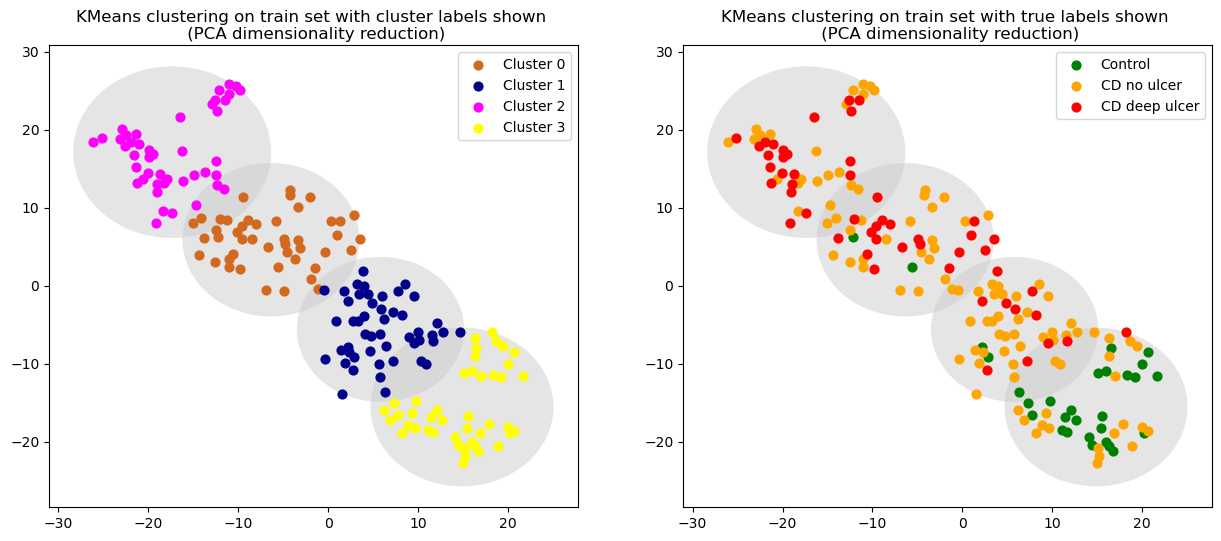

In [27]:
plot_kmeans(X_train_pca, train_disease_labels, k_labels_train_pca, centers_pca, radii_pca, "PCA", test_set=False)

C:\Users\shard\AppData\Local\Temp\ipykernel_35776\3552133945.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(Y[label_set==i, 0], Y[label_set==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2)


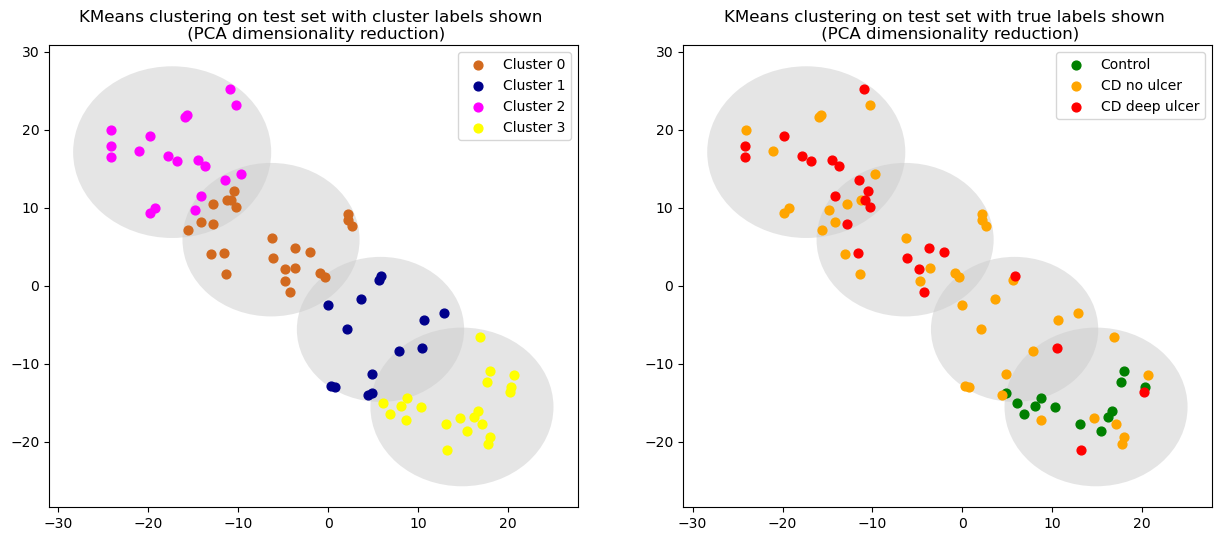

In [28]:
plot_kmeans(X_test_pca, test_disease_labels, k_labels_test_pca, centers_pca, radii_pca, "PCA", test_set=True)

### Fit KMeans (Autoencoder & tSNE dimensionality reduction)

In [29]:
# compress to 2D with tSNE
tsne = manifold.TSNE(
    n_components=2,
    init="random",
    random_state=0,
    perplexity=24,
    n_iter=750,
    method='exact'
)
X = tsne.fit_transform(full_ae_dataset)
X_test_ae = X[split_pt:]
X_train_ae = X[:split_pt]
# X_train = np.concatenate([X[:split_pt], X[-num_c:]])

In [30]:
num_c=4
kmeans_ae = KMeans(num_c, random_state=0).fit(X_train_ae)
k_labels_train_ae = kmeans_ae.predict(X_train_ae)
k_labels_test_ae = kmeans_ae.predict(X_test_ae)


C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [31]:


# representation of the KMeans model (both)
# centers = X[-num_c:]
centers_ae = kmeans_ae.cluster_centers_
radii_ae = [cdist(X_train_ae[k_labels_train_ae == i], [center]).max()
         for i, center in enumerate(centers_ae)]

C:\Users\shard\AppData\Local\Temp\ipykernel_35776\3552133945.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(Y[label_set==i, 0], Y[label_set==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2)


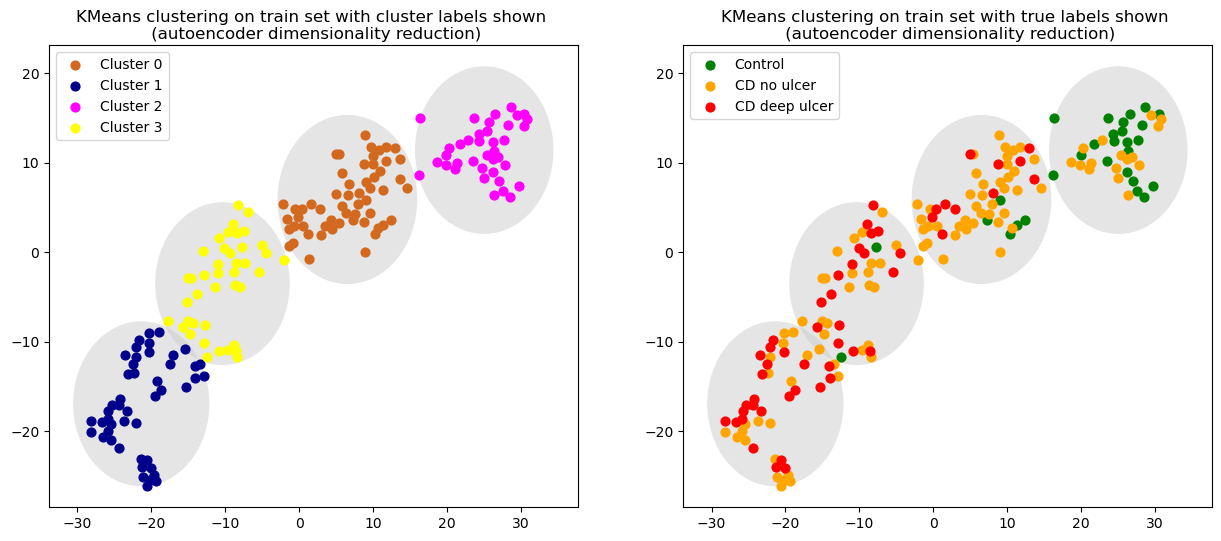

In [32]:
plot_kmeans(X_train_ae, train_disease_labels, k_labels_train_ae, centers_ae, radii_ae, "autoencoder", test_set=False)

C:\Users\shard\AppData\Local\Temp\ipykernel_35776\3552133945.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(Y[label_set==i, 0], Y[label_set==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2)


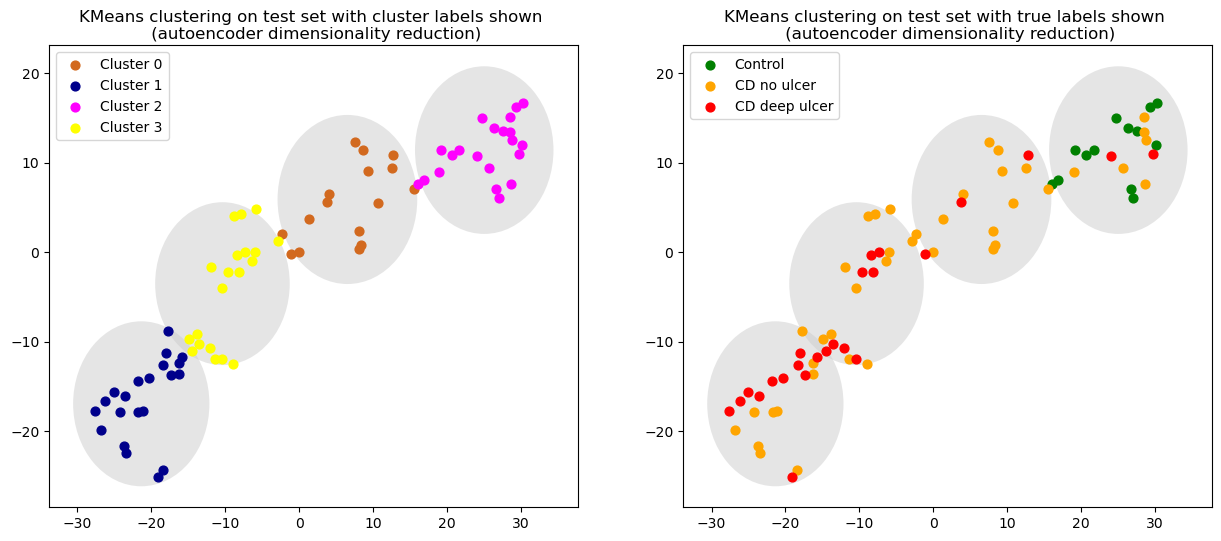

In [33]:
plot_kmeans(X_test_ae, test_disease_labels, k_labels_test_ae, centers_ae, radii_ae, "autoencoder", test_set=True)

## Process KMeans models

In [34]:
def pair_repeat(dup, cls_assignments, num_c, amounts):
    all_clusters = np.arange(num_c)
    # replace one of the duplicates with max of remaining clusters
    replace_class = np.where(cls_assignments == dup[0])[0][0]
    rem_cluster_a, rem_cluster_b = np.setdiff1d(all_clusters,cls_assignments)
    # rem_cluster_b
    if amounts[replace_class][rem_cluster_a] > amounts[replace_class][rem_cluster_b]:
        cls_assignments[replace_class] = rem_cluster_a
    else:
        cls_assignments[replace_class] = rem_cluster_b
        
    return cls_assignments

def handle_duplicates(cls_assignments, dup, c, num_c, amounts):
#     print("c:",c)
    if len(c) != 1:
        
        cls_assignments = pair_repeat(dup, cls_assignments, num_c, amounts)
    else: # 3 repeats of same thing
        # reassign class least associated to next most associated cluster
        given_cluster = dup[0]
        cls_least = np.argmin(amounts[:,given_cluster])
#         print(cls_least)
        class_amounts = amounts[cls_least,:]
        class_amounts[given_cluster] = -1
        next_cluster = np.argmax(class_amounts)
        cls_assignments[cls_least] = next_cluster
#         print("intermediate assignments",cls_assignments)
        
        # handle other duplicate pair
        u, c = np.unique(cls_assignments, return_counts=True)
        dup = u[c > 1]
        cls_assignments = pair_repeat(dup, cls_assignments, num_c, amounts)

    return cls_assignments

In [35]:

    
def process_clusters(amounts, X_train, num_c):
    all_clusters = np.arange(num_c)

    
    cls_assignments = np.argmax(amounts, axis=1) # assigned to class 0, 1, 2
    print("initial cls assignments:",cls_assignments)
    
    # check for and handle duplicates
    u, c = np.unique(cls_assignments, return_counts=True)
    dup = u[c > 1]
#     print("dup:",dup[0])
    if len(dup) > 0:
        cls_assignments = handle_duplicates(cls_assignments, dup, c, num_c, amounts)
        
            
    class_assignment_amounts = np.max(amounts, axis=1) 
    
    assignments = [None] * 3
    
    assigned = 0
    while assigned < num_c - 1:
        curr_max_class = np.argmax(class_assignment_amounts)
        assigned_cluster = cls_assignments[curr_max_class]
        if assignments[curr_max_class] is None:
            assignments[curr_max_class] = [assigned_cluster]
        else:
            assignments[curr_max_class].append(assigned_cluster)
        class_assignment_amounts[curr_max_class] = -1
        assigned += 1

    # Assign remaining cluster
    
    rem_cluster = np.setdiff1d(all_clusters,cls_assignments)[0]
    
    rem_cls_assignment = np.argmax(amounts[:,rem_cluster], axis=0)
    assignments[rem_cls_assignment].append(rem_cluster)
    couple = assignments[rem_cls_assignment]
    # clusters assigned to disease class 0, 1, 2 (control, CD_no_ulcer, CD_deep_ulcer)
    
#     print(assignments)
#     print(couple)
    return assignments, couple

In [36]:
def get_class_from_label(label, couple, assignments):
    if label in couple:
        search_term = couple
    else:
        search_term = [label]
    try:
        cls = assignments.index(search_term)
    except:
        return None
    return cls


In [37]:
def get_final_clusters(assignments, couple, labels):
    test_set_clusters = []
    for label in labels:
        cls = get_class_from_label(label, couple, assignments)
        test_set_clusters.append(cls)

    test_set_clusters = np.array(test_set_clusters)
    return test_set_clusters

In [38]:
# centers = kmeans.cluster_centers_
# centers

In [39]:
def get_count_matrix_km(kmeans, X_train, train_disease_labels):

    
    # make matrix to record number of each class in each cluster
    amounts = np.zeros((3, num_c))
    
    
    classes = ["control", "CD_no_ulcer", "CD_deep_ulcer"]
    centers = kmeans.cluster_centers_
    for c, cls in enumerate(classes):
        for pt in X_train[train_disease_labels==c]:
            pt = pt.reshape(1,-1)
            distances = cdist(centers, pt, 'euclidean')
            closest_cluster = np.argmin(distances)
            amounts[c][closest_cluster] += 1
    

#     print(amounts)
    #                cluster 0, cluster 1, cluster 2, cluster 3
    # control 
    # CD no ulcer
    # CD deep ulcer
    
    return amounts

In [40]:
# get_count_matrix_km(kmeans, X_train, train_disease_labels)

### Apply resulting models to test sets

In [41]:
centers_pca

array([[ -6.371068 ,   5.9056115],
       [  5.8009024,  -5.5992637],
       [-17.361135 ,  17.134462 ],
       [ 14.8569355, -15.547556 ]], dtype=float32)

In [42]:
km_labels_list = [k_labels_test_ae, k_labels_test_pca]
km_models_list = [kmeans_ae, kmeans_pca]
train_set_list = [X_train_ae, X_train_pca]
test_set_list = [X_test_ae, X_test_pca]
centers_list = [centers_ae, centers_pca]
radii_list = [radii_ae, radii_pca]


In [43]:
# X_test_ae

initial cls assignments: [2 0 1]
initial cls assignments: [3 1 2]


C:\Users\shard\AppData\Local\Temp\ipykernel_35776\4001669837.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_test[test_set_clusters==i, 0], X_test[test_set_clusters==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2)


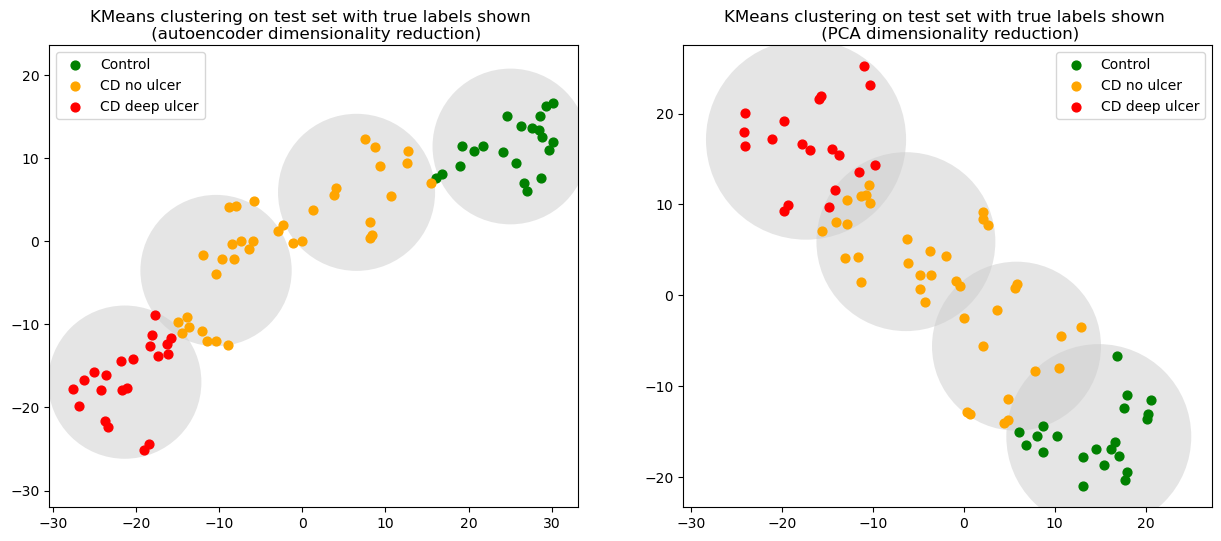

In [44]:
def plot_final_km_models(labels_list, models_list, train_set_list, test_set_list, centers_list, radii_list, num_c):
#         left = -8
#         right = 8
#         ax.set_xlim(left, right)
#         ax.set_ylim(left, right)
        
        
#         if i==0:
#             num_clusters = num_c
#             cluster_names = ["Cluster " + str(i) for i in range(num_clusters)]
#             colours = ["chocolate", "darkblue", "magenta", "yellow", "blue"]
#             ax.set_title("GMM soft clustering on " + dset + " set with cluster labels shown \n (" + reduction + " dimensionality reduction)",
#                          wrap=True)
#         else:
#     fig, ax = plt.subplots()
    (fig, subplots) = plt.subplots(1, 2, figsize=(15, 6))
    reduction = ["autoencoder", "PCA"]
    final_clusters_lst = []
    for i in range(len(models_list)):
#         print(i)
        ax = subplots[i]
        km = models_list[i]
        km_labels = labels_list[i]
        X_train = train_set_list[i]
        X_test = test_set_list[i]
        centers = centers_list[i]
        radii = radii_list[i]
        amounts = get_count_matrix_km(km, X_train, train_disease_labels)
        assignments, couple = process_clusters(amounts, X_train, num_c)
        test_set_clusters = get_final_clusters(assignments, couple, km_labels)
#         print("gmmlabels:",gmm_labels)
#         print("tsclusters:",test_set_clusters)
#         print("asgn:",assignments)
        final_clusters_lst.append(test_set_clusters)




        reduc = reduction[i]
        num_clusters = 3
        cluster_names = ["Control", "CD no ulcer", "CD deep ulcer"]
        colours = ["green", "orange", "red"]
        ax.set_title("KMeans clustering on test set with true labels shown \n (" + reduc + " dimensionality reduction)",
                    wrap=True)

        for i in range(num_clusters):
            ax.scatter(X_test[test_set_clusters==i, 0], X_test[test_set_clusters==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2) 

        ax.axis('equal')


        for c, r in zip(centers, radii):
            ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
            
        ax.legend()
    
#     print(final_assignments_lst)
    return final_clusters_lst
        
final_clusters_ae, final_clusters_pca = plot_final_km_models(km_labels_list, km_models_list, train_set_list, test_set_list, centers_list, radii_list, num_c)

In [45]:
final_clusters_ae

array([0, 1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1,
       0, 1, 2, 0, 0, 2, 0, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 2, 1, 1, 0, 2, 2, 2,
       0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1])

## Gaussian Mixture Models

In [46]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

from matplotlib.patches import Ellipse
from sklearn import mixture

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, true_labels, reduction, num_c=3, test=False):
    gmm_labels = gmm.predict(X)
    (fig, subplots) = plt.subplots(1, 2, figsize=(15, 6))
#     ax = ax or plt.gca()
    labels = [gmm_labels, true_labels]
    num_clusters = 3
    dset = "test" if test else "train"
    for i, label_set in enumerate(labels):
        ax = subplots[i]
#         left = -8
#         right = 8
#         ax.set_xlim(left, right)
#         ax.set_ylim(left, right)
        
        
        if i==0:
            num_clusters = num_c
            cluster_names = ["Cluster " + str(i) for i in range(num_clusters)]
            colours = ["chocolate", "darkblue", "magenta", "yellow", "blue"]
            ax.set_title("GMM soft clustering on " + dset + " set with cluster labels shown \n (" + reduction + " dimensionality reduction)",
                         wrap=True)
        else:
            num_clusters = 3
            cluster_names = ["Control", "CD no ulcer", "CD deep ulcer"]
            colours = ["green", "orange", "red"]
            ax.set_title("GMM soft clustering on " + dset + " set with true labels shown \n (" + reduction + " dimensionality reduction)",
                        wrap=True)
            
        for i in range(num_clusters):
            ax.scatter(X[label_set==i, 0], X[label_set==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2) 

        ax.axis('equal')
        

        w_factor = 0.2 / gmm.weights_.max()
        for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
            draw_ellipse(pos, covar, alpha=w * w_factor, ax=ax)
        ax.legend()
    return gmm_labels

        
# def get_tsne_ds_true_labels():
#     tsne = manifold.TSNE(
#         n_components=2,
#         init="random",
#         random_state=0,
#         perplexity=24,
#         n_iter=750,
#         method='exact'
#     )
#     X = tsne.fit_transform(test_set)

In [47]:
# gmm.means_
# gmm.covariances_
# gmm.weights_

### Fit and visualise in 2D - PCA dimensionality reduction

In [48]:
num_c = 4
gmm_pca = mixture.GaussianMixture(n_components=num_c,covariance_type='full', random_state=42)
# gmm = GMM(n_components=4, random_state=42)
# g_labels = 
tsne = manifold.TSNE(
    n_components=2,
    init="random",
    random_state=0,
    perplexity=24,
    n_iter=750,
    method='exact'
)
X = tsne.fit_transform(full_pca_dataset)
X_test_pca = X[split_pt:]
X_train_pca = X[:split_pt]
gmm_pca.fit(X_train_pca)

C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GaussianMixture(n_components=4, random_state=42)

C:\Users\shard\AppData\Local\Temp\ipykernel_35776\758358278.py:53: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[label_set==i, 0], X[label_set==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2)
C:\Users\shard\AppData\Local\Temp\ipykernel_35776\758358278.py:21: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


array([0, 3, 0, 2, 3, 3, 2, 3, 3, 2, 2, 1, 3, 2, 2, 1, 0, 2, 3, 2, 0, 3,
       1, 0, 2, 3, 3, 3, 0, 0, 2, 3, 3, 3, 3, 3, 0, 3, 2, 3, 2, 3, 2, 2,
       2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 0, 3, 2, 3, 3, 3, 3, 2, 2, 3, 1,
       3, 3, 3, 2, 3, 3, 0, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 0, 2,
       0, 2, 0, 0, 3, 2, 2, 0, 3, 3, 3, 0, 2, 3, 3, 2, 1, 3, 2, 0, 3, 3,
       2, 2, 0, 3, 3, 2, 3, 2, 3, 0, 1, 2, 3, 2, 0, 2, 1, 2, 3, 2, 2, 2,
       2, 2, 3, 3, 1, 2, 2, 1, 2, 0, 3, 2, 3, 2, 0, 3, 2, 0, 2, 2, 3, 3,
       3, 2, 3, 0, 3, 2, 2, 3, 0, 0, 3, 2, 0, 2, 2, 3, 0, 3, 3, 3, 0, 0,
       0, 1, 3, 3, 3, 3], dtype=int64)

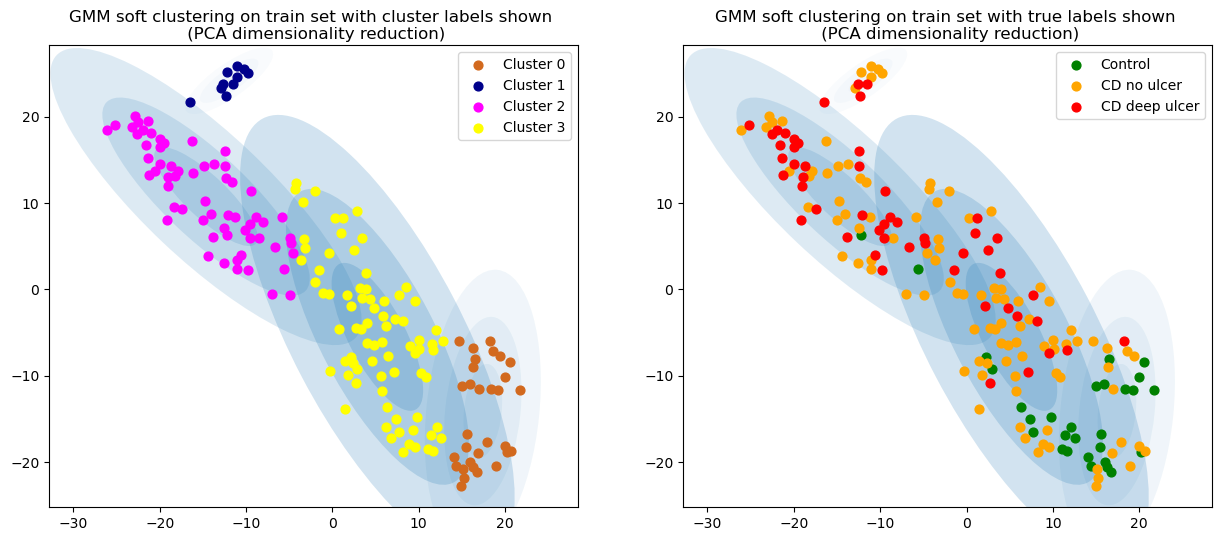

In [49]:

plot_gmm(gmm_pca, X_train_pca, train_disease_labels, "PCA", num_c=num_c)

C:\Users\shard\AppData\Local\Temp\ipykernel_35776\758358278.py:53: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[label_set==i, 0], X[label_set==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2)
C:\Users\shard\AppData\Local\Temp\ipykernel_35776\758358278.py:21: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


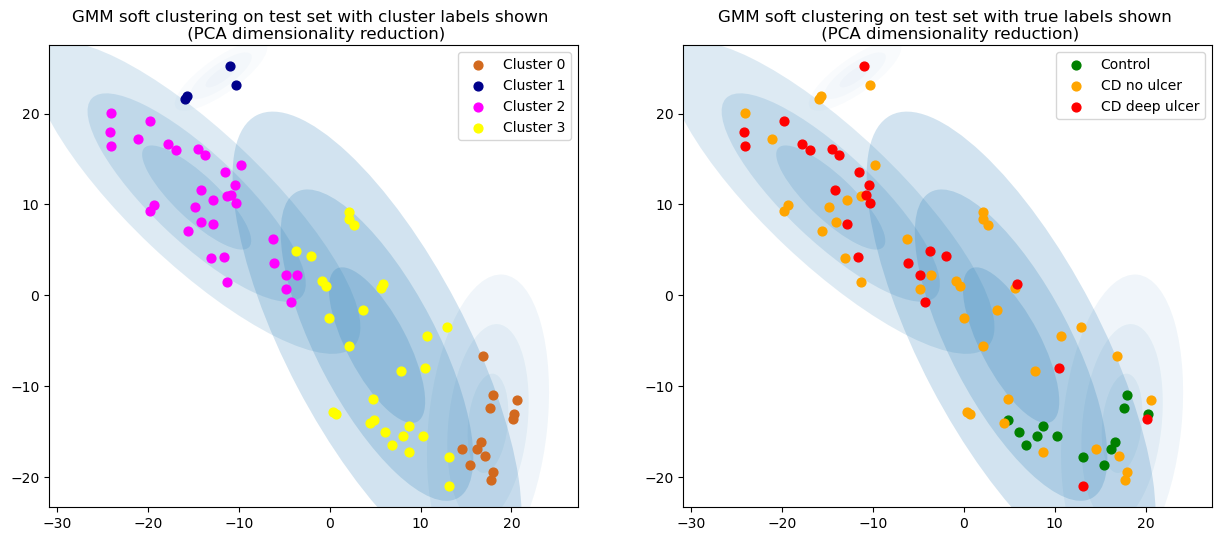

In [50]:

gmm_labels_pca = plot_gmm(gmm_pca, X_test_pca, test_disease_labels, "PCA", num_c=num_c, test=True)

### Fit and visualise in 2D - autoencoder dimensionality reduction

In [51]:
# X_train_ae

In [52]:
num_c = 4
gmm_ae = mixture.GaussianMixture(n_components=num_c,covariance_type='full', random_state=42)
# gmm = GMM(n_components=4, random_state=42)
# g_labels = 
tsne = manifold.TSNE(
    n_components=2,
    init="random",
    random_state=0,
    perplexity=24,
    n_iter=750,
    method='exact'
)
X = tsne.fit_transform(full_ae_dataset)
X_test_ae = X[split_pt:]
X_train_ae = X[:split_pt]
gmm_ae.fit(X_train_ae)

C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GaussianMixture(n_components=4, random_state=42)

C:\Users\shard\AppData\Local\Temp\ipykernel_35776\758358278.py:53: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[label_set==i, 0], X[label_set==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2)
C:\Users\shard\AppData\Local\Temp\ipykernel_35776\758358278.py:21: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


array([2, 3, 0, 3, 2, 3, 3, 3, 3, 1, 1, 1, 0, 1, 3, 1, 0, 3, 0, 3, 0, 0,
       1, 0, 3, 2, 3, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 1, 2, 3, 3, 1, 1,
       2, 2, 2, 0, 2, 3, 1, 3, 3, 2, 2, 0, 2, 3, 2, 2, 3, 2, 3, 1, 2, 1,
       2, 2, 2, 3, 2, 2, 2, 0, 0, 2, 2, 3, 2, 3, 1, 3, 1, 1, 3, 2, 0, 3,
       0, 3, 0, 2, 2, 1, 3, 0, 2, 2, 3, 0, 1, 3, 2, 1, 1, 2, 3, 0, 2, 3,
       3, 1, 0, 2, 2, 1, 2, 1, 2, 0, 1, 3, 0, 3, 0, 1, 1, 1, 0, 3, 1, 3,
       3, 1, 2, 2, 1, 1, 3, 1, 3, 0, 2, 3, 3, 1, 0, 2, 3, 2, 1, 1, 2, 2,
       2, 1, 2, 2, 2, 3, 1, 2, 2, 0, 2, 1, 2, 3, 3, 0, 0, 0, 2, 0, 2, 0,
       0, 1, 3, 0, 2, 2], dtype=int64)

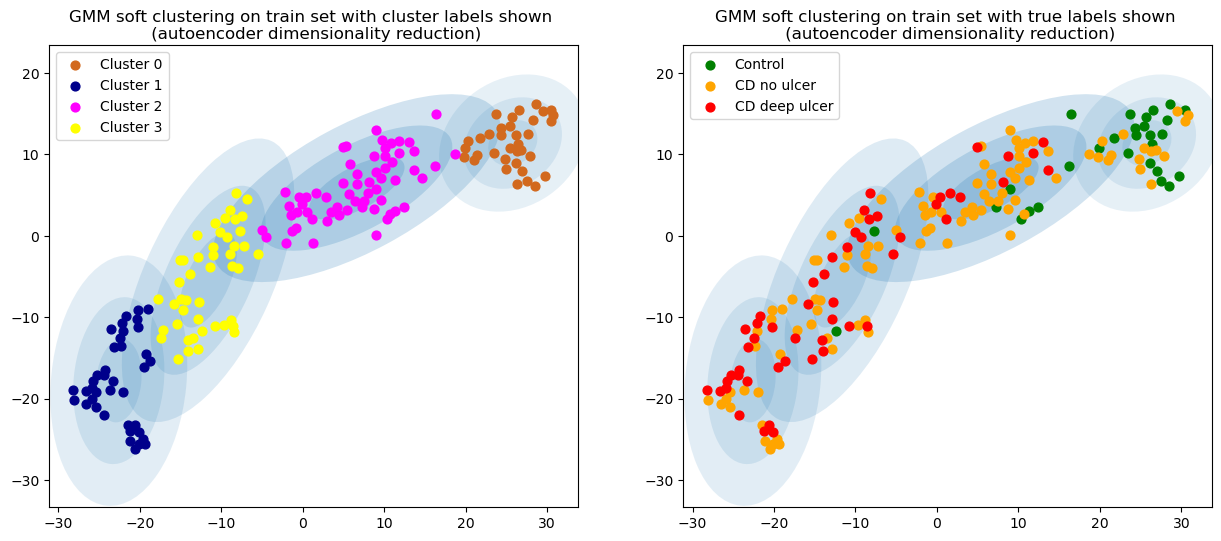

In [53]:

plot_gmm(gmm_ae, X_train_ae, train_disease_labels, "autoencoder", num_c=num_c)

C:\Users\shard\AppData\Local\Temp\ipykernel_35776\758358278.py:53: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[label_set==i, 0], X[label_set==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2)
C:\Users\shard\AppData\Local\Temp\ipykernel_35776\758358278.py:21: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


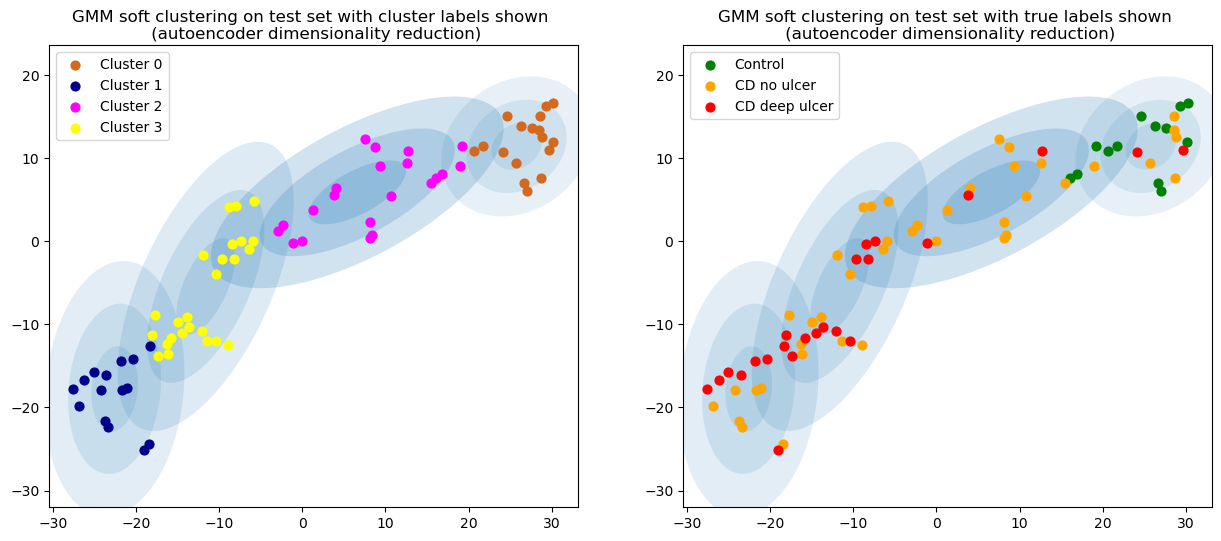

In [54]:

gmm_labels_ae = plot_gmm(gmm_ae, X_test_ae, test_disease_labels, "autoencoder", num_c=num_c, test=True)

## Process GMM cluster models

In [55]:
import scipy.stats
from scipy.stats import multivariate_normal


In [56]:
# vis
# x, y = np.mgrid[0:30:.01, 0:30:.01]
# pos = np.dstack((x, y))
# fig2 = plt.figure()
# ax2 = fig2.add_subplot(111)
# # for i in range(2):
# ax2.contourf(x, y, comps[0].pdf(pos))
# ax2.contourf(x, y, comps[2].pdf(pos))

In [57]:
def get_amount_matrix_gmm(gmm, X_train, train_disease_labels):
    mu, covar, w = gmm.means_, gmm.covariances_, gmm.weights_
    # print("means:",mu)
    # print("covariances_:",covar)
    # print("weights_:",w)
    
    comps = [multivariate_normal(mu[i], covar[i]) for i in range(num_c)]
    
    # make matrix to record amount of each class in each mixture component
    amounts = np.zeros((3, num_c))
    
    
    classes = ["control", "CD_no_ulcer", "CD_deep_ulcer"]
    for c, cls in enumerate(classes):
        for i, comp in enumerate(comps): # add up contributions for each component
            weight = w[i]
            pts = X_train[train_disease_labels==c]
            curr_sum = np.sum(comp.pdf(pts)) * weight
            amounts[c][i] = curr_sum
    print(amounts)
    #                cluster 0, cluster 1, cluster 2, cluster 3
    # control 
    # CD no ulcer
    # CD deep ulcer
    
    return amounts

### Apply resulting models to test sets

In [58]:
gmm_labels_list = [gmm_labels_ae, gmm_labels_pca]
gmm_models_list = [gmm_ae, gmm_pca]
train_set_list = [X_train_ae, X_train_pca]
test_set_list = [X_test_ae, X_test_pca]


In [59]:
# X_test_ae

[[3.44425608e-02 2.51282490e-06 8.10837699e-03 2.38645104e-03]
 [2.52158784e-02 1.85060671e-02 7.27648180e-02 2.85801795e-02]
 [1.33005274e-06 2.41975945e-02 2.03018423e-02 2.31364980e-02]]
initial cls assignments: [0 2 1]
[[1.50846395e-002 6.20783152e-117 2.74224434e-003 1.37757009e-002]
 [1.13991822e-002 2.09249474e-002 3.84224678e-002 6.23735769e-002]
 [6.67803127e-004 1.15754591e-002 4.03989222e-002 2.10052750e-002]]
initial cls assignments: [0 3 2]


C:\Users\shard\AppData\Local\Temp\ipykernel_35776\2796964228.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_test[test_set_clusters==i, 0], X_test[test_set_clusters==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2)
C:\Users\shard\AppData\Local\Temp\ipykernel_35776\758358278.py:21: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


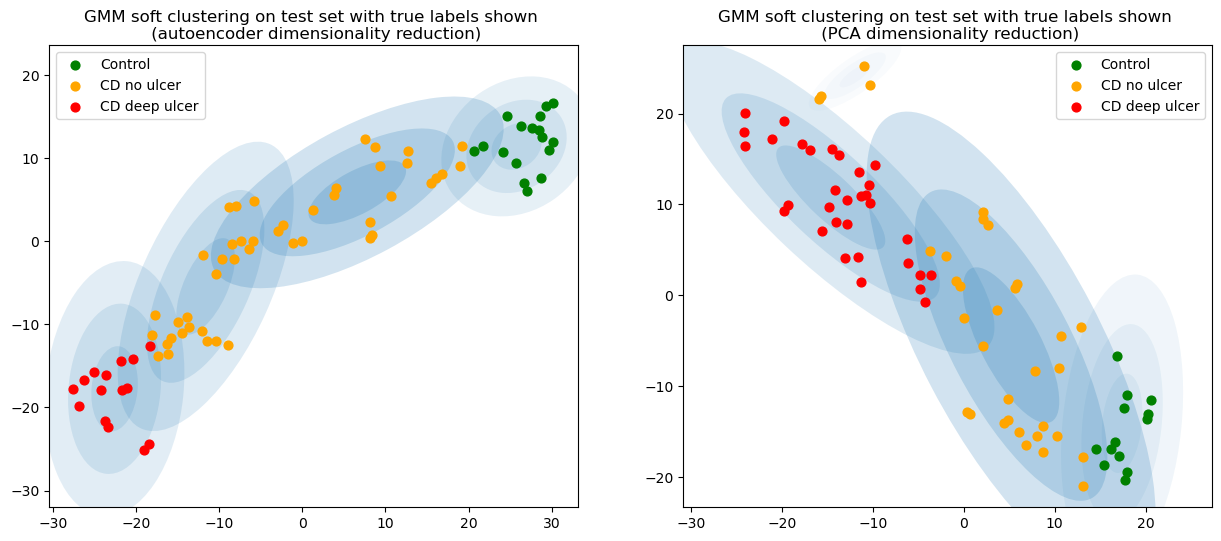

In [60]:
def plot_final_gmm_models(gmm_labels_list, gmm_models_list, train_set_list, test_set_list, num_c):
#         left = -8
#         right = 8
#         ax.set_xlim(left, right)
#         ax.set_ylim(left, right)
        
        
#         if i==0:
#             num_clusters = num_c
#             cluster_names = ["Cluster " + str(i) for i in range(num_clusters)]
#             colours = ["chocolate", "darkblue", "magenta", "yellow", "blue"]
#             ax.set_title("GMM soft clustering on " + dset + " set with cluster labels shown \n (" + reduction + " dimensionality reduction)",
#                          wrap=True)
#         else:
#     fig, ax = plt.subplots()
    (fig, subplots) = plt.subplots(1, 2, figsize=(15, 6))
    reduction = ["autoencoder", "PCA"]
    final_clusters_lst = []
    for i in range(len(gmm_models_list)):
#         print(i)
        ax = subplots[i]
        gmm = gmm_models_list[i]
        gmm_labels = gmm_labels_list[i]
        X_train = train_set_list[i]
        X_test = test_set_list[i]
        amounts = get_amount_matrix_gmm(gmm, X_train, train_disease_labels)
        assignments, couple = process_clusters(amounts, X_train, num_c)
        test_set_clusters = get_final_clusters(assignments, couple, gmm_labels)
#         print("gmmlabels:",gmm_labels)
#         print("tsclusters:",test_set_clusters)
#         print("asgn:",assignments)
        final_clusters_lst.append(test_set_clusters)




        reduc = reduction[i]
        num_clusters = 3
        cluster_names = ["Control", "CD no ulcer", "CD deep ulcer"]
        colours = ["green", "orange", "red"]
        ax.set_title("GMM soft clustering on test set with true labels shown \n (" + reduc + " dimensionality reduction)",
                    wrap=True)

        for i in range(num_clusters):
            ax.scatter(X_test[test_set_clusters==i, 0], X_test[test_set_clusters==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2) 

        ax.axis('equal')


        w_factor = 0.2 / gmm.weights_.max()
        for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
            draw_ellipse(pos, covar, alpha=w * w_factor, ax=ax)
        ax.legend()
    
#     print(final_assignments_lst)
    return final_clusters_lst
        
final_clusters_gmm_ae, final_clusters_gmm_pca = plot_final_gmm_models(gmm_labels_list, gmm_models_list, train_set_list, test_set_list, num_c)

3rd graph - substructure clustering processed in combination with true labels to obtain final 3 cluster clustering; model can now be easily coupled to shap - why better than simple k=3 clustering

## Find class probabilities from cluster model

In [61]:
def get_probs(point, comps, assignments, w):
    probs = []
    for elem in assignments:
        p_cand = []
        for cluster in elem:
            p = comps[cluster].pdf(point) * w[cluster]
#             print("p:",p)
            p_cand.append(p)
#         print(p_cand)
        p = max(p_cand)
        probs.append(p)
        
    return probs

def sum_to_one(vals): 
#     print(t, u)
    return vals / vals.sum()


In [62]:
def get_proba(gmm, assignments, X_test):
    # GMM mixture component distributions
    mu, covar, w = gmm.means_, gmm.covariances_, gmm.weights_
    # print("means:",mu)
    # print("covariances_:",covar)
    # print("weights_:",w)
    comps = [multivariate_normal(mu[i], covar[i]) for i in range(num_c)]

    X_test = X_test.tolist()
    new_list = []
    for point in X_test:
        probs = get_probs(point, comps, assignments, gmm.weights_)
        new_list.append(probs)
    pdf_vals = np.asarray(new_list)

    # rescale so adds up to 1
    proba = pdf_vals.copy()
    for i in range(len(proba)):
        row = proba[i,:]
        rescaled = sum_to_one(row)

        proba[i,:] = rescaled
    
    return proba

In [63]:
amounts = get_amount_matrix_gmm(gmm_ae, X_train_ae, train_disease_labels)
assignments_ae, couple_ae = process_clusters(amounts, X_train_ae, num_c)
assignments_ae

[[3.44425608e-02 2.51282490e-06 8.10837699e-03 2.38645104e-03]
 [2.52158784e-02 1.85060671e-02 7.27648180e-02 2.85801795e-02]
 [1.33005274e-06 2.41975945e-02 2.03018423e-02 2.31364980e-02]]
initial cls assignments: [0 2 1]


[[0], [2, 3], [1]]

In [64]:
amounts = get_amount_matrix_gmm(gmm_pca, X_train_pca, train_disease_labels)
assignments_pca, couple_pca = process_clusters(amounts, X_train_pca, num_c)
assignments_pca

[[1.50846395e-002 6.20783152e-117 2.74224434e-003 1.37757009e-002]
 [1.13991822e-002 2.09249474e-002 3.84224678e-002 6.23735769e-002]
 [6.67803127e-004 1.15754591e-002 4.03989222e-002 2.10052750e-002]]
initial cls assignments: [0 3 2]


[[0], [3, 1], [2]]

In [65]:
# gmm = gmm_ae
# assignments = assignments_ae

In [66]:
gmm_ae_prob = get_proba(gmm_ae, assignments_ae, X_test_ae)

In [67]:
gmm_pca_prob = get_proba(gmm_pca, assignments_pca, X_test_pca)

## Evaluation of final clustering models

### Mutual information scores

In [68]:
from sklearn.metrics import adjusted_mutual_info_score as mut_info

In [69]:
test_disease_labels # true clusters to which we compare

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1,
       1, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 1,
       0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2])

#### GMM

In [70]:
final_clusters_gmm_ae

array([0, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       0, 1, 2, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1])

In [71]:
final_clusters_gmm_pca

array([0, 0, 2, 1, 1, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 1, 1, 0,
       1, 2, 1, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2])

In [72]:


mut_info(test_disease_labels, final_clusters_gmm_ae)  

0.1548224744191735

In [73]:
mut_info(test_disease_labels, final_clusters_gmm_pca)  

0.13970000200413626

#### KMeans

In [74]:
final_clusters_ae

array([0, 1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1,
       0, 1, 2, 0, 0, 2, 0, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 2, 1, 1, 0, 2, 2, 2,
       0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1])

In [75]:
final_clusters_pca

array([0, 0, 2, 1, 1, 0, 2, 2, 2, 0, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1,
       0, 1, 2, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1])

In [76]:


mut_info(test_disease_labels, final_clusters_ae)  

0.2641261562627138

In [77]:
mut_info(test_disease_labels, final_clusters_pca)  

0.2012348274069471

Autoencoder does better in both cases

### Silhouette analysis

C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5662344175321901


C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.4358297989156284


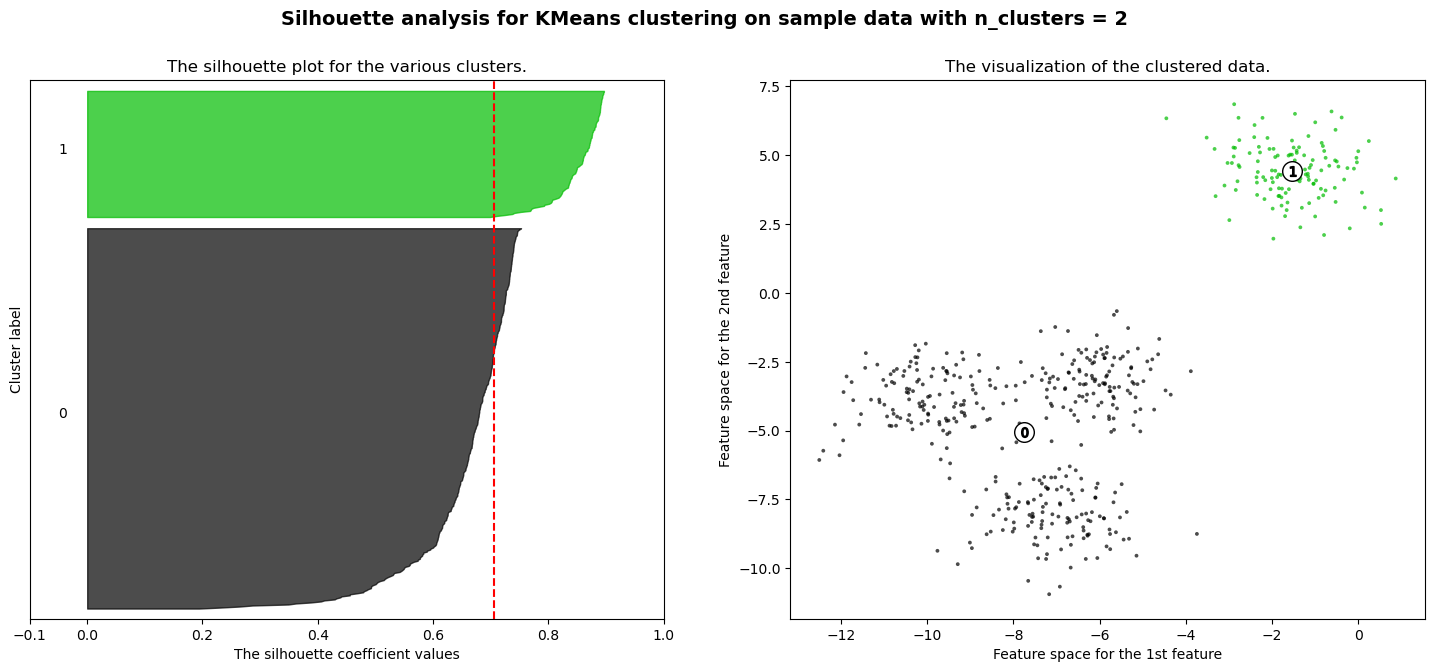

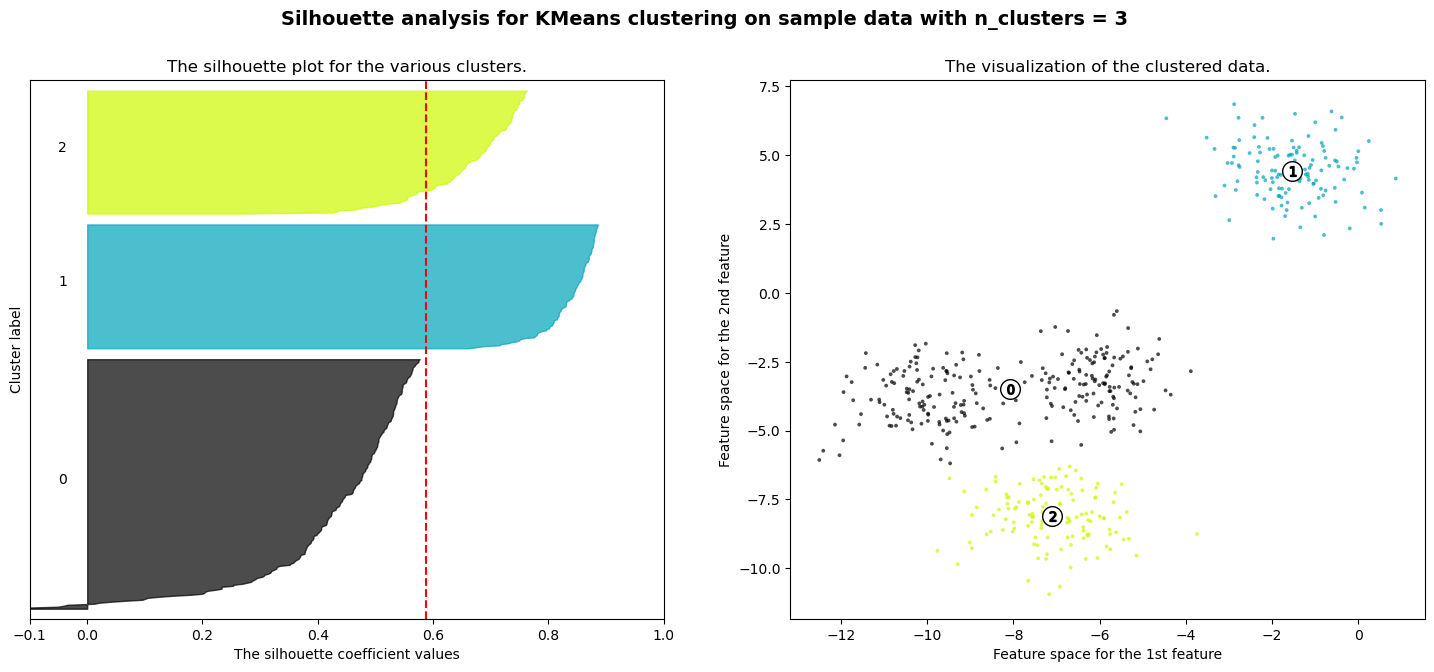

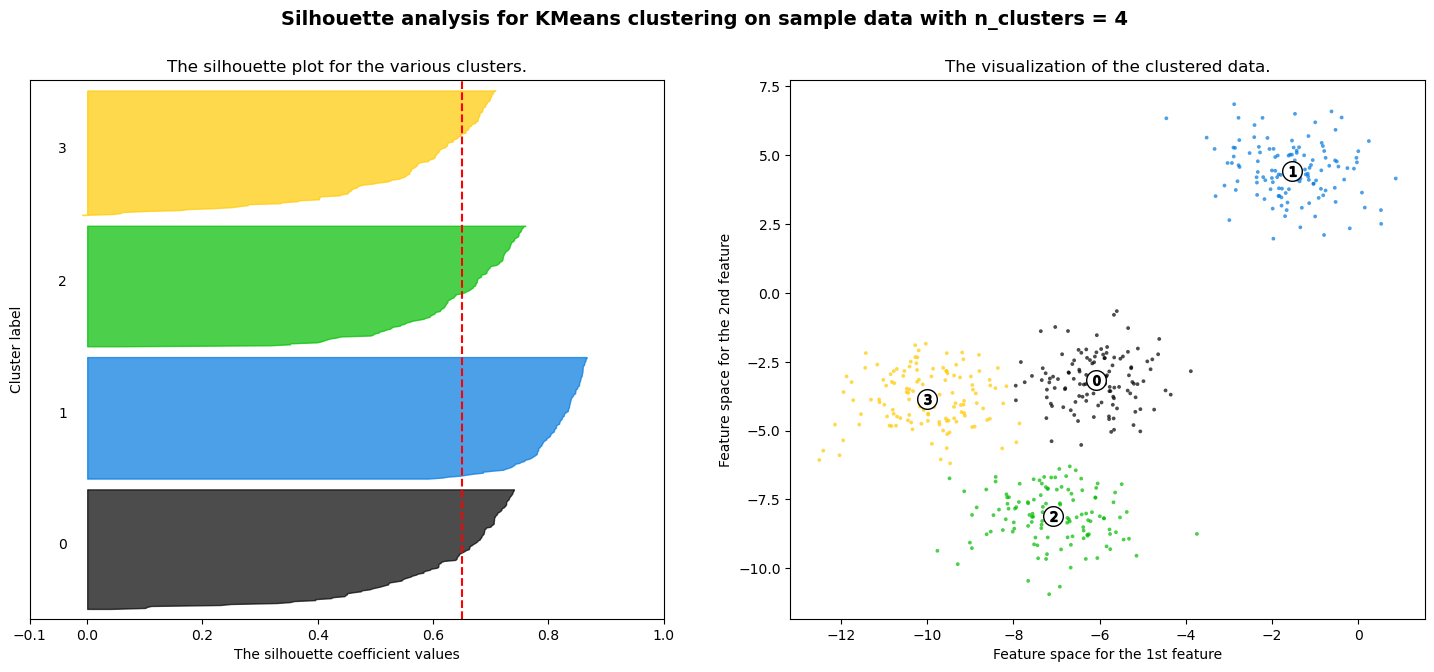

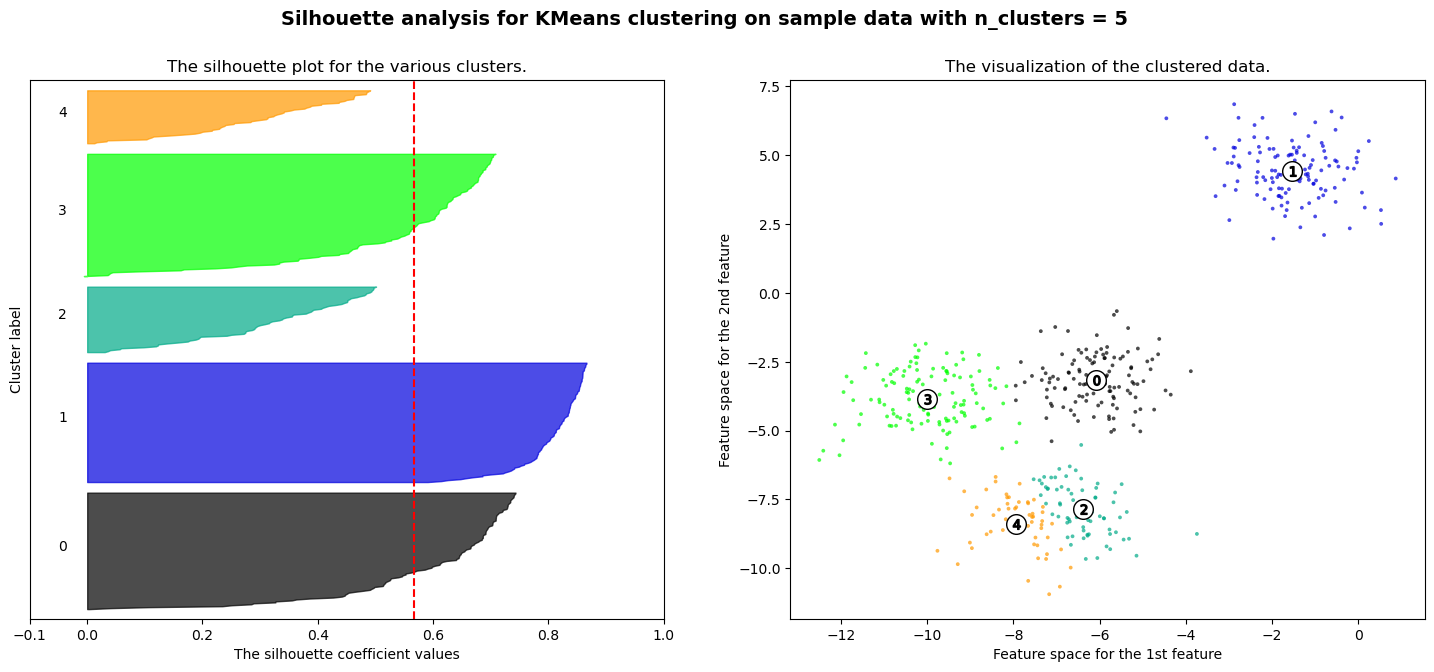

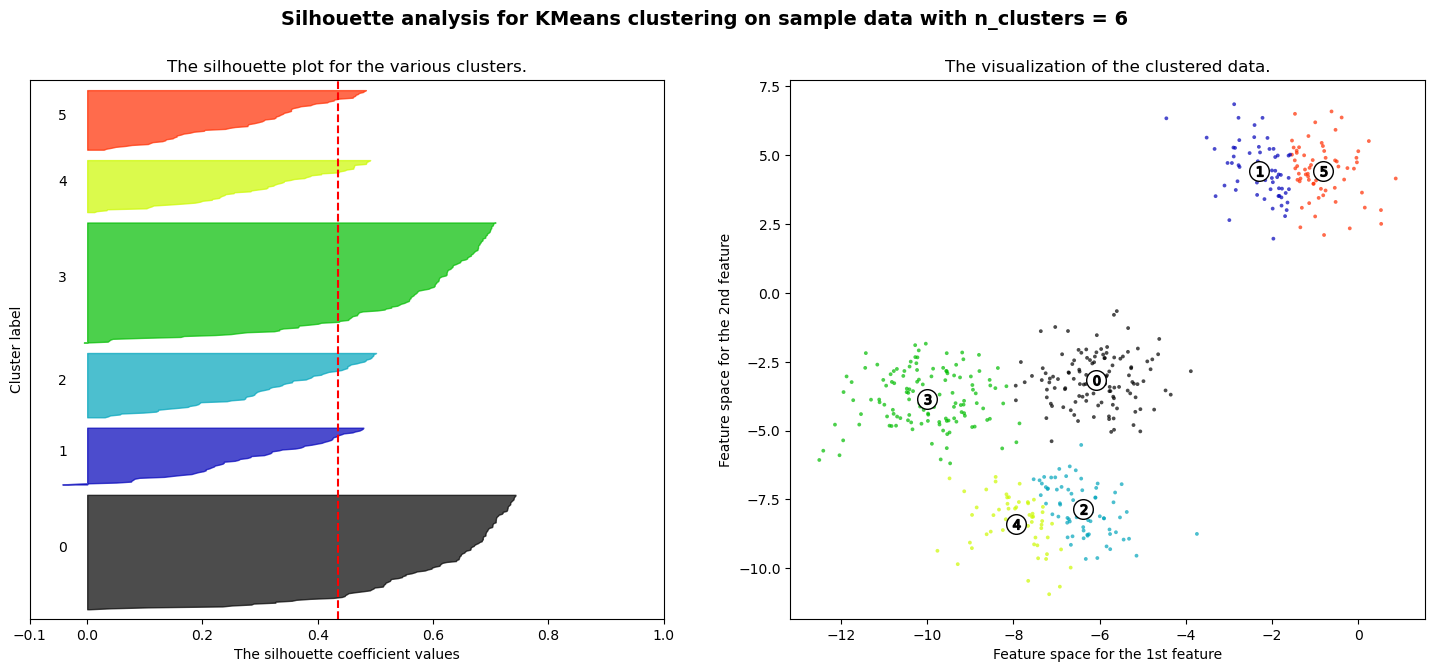

In [78]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## Retrieving probabilities across classes using GMM model

In [79]:
gmm_ae_prob = get_proba(gmm_ae, assignments_ae, X_test_ae)
# gmm_ae_prob

In [80]:
gmm_pca_prob = get_proba(gmm_pca, assignments_pca, X_test_pca)